<a href="https://colab.research.google.com/github/ashish311002/SoC-Personality-Detection-using-data-from-Social-Media/blob/main/SoC_FinalImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/datasets_for_SoC/Big Five Personality Test/data-final.csv',delimiter='\t')


In [ ]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


#EDA


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   float64
 1    EXT2                   float64
 2    EXT3                   float64
 3    EXT4                   float64
 4    EXT5                   float64
 5    EXT6                   float64
 6    EXT7                   float64
 7    EXT8                   float64
 8    EXT9                   float64
 9    EXT10                  float64
 10   EST1                   float64
 11   EST2                   float64
 12   EST3                   float64
 13   EST4                   float64
 14   EST5                   float64
 15   EST6                   float64
 16   EST7                   float64
 17   EST8                   float64
 18   EST9                   float64
 19   EST10                  float64
 20   AGR1                   float64
 21   AGR2                   float6

In [ ]:
data=df.copy()

In [ ]:
#To drop all columns except the ones which are necessary(Country column as well as the questions columns)
data.drop(data.columns[50:107],axis=1,inplace=True)
data.drop(data.columns[51:],axis=1,inplace=True)

In [ ]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
data.shape

(1015341, 51)

In [ ]:
print(data.isnull().values.sum())

89227


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(1013481, 51)

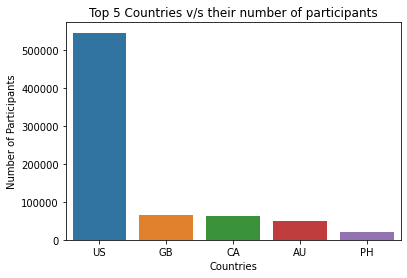

In [ ]:
countries=pd.DataFrame(data['country'].value_counts())
top5countries=countries[0:5]

sns.barplot(data=top5countries, x=top5countries.index, y='country')
plt.title('Top 5 Countries v/s their number of participants')
plt.ylabel('Number of Participants')
plt.xlabel('Countries')
plt.show()

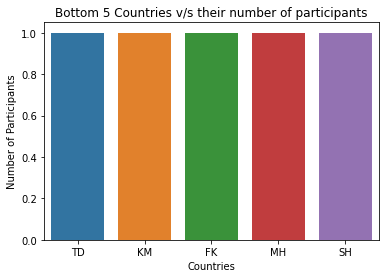

In [ ]:
#5 Countries with Least Amount of participants
bottom5countries=countries[-5:]

sns.barplot(data=bottom5countries, x=bottom5countries.index, y='country')
plt.title('Bottom 5 Countries v/s their number of participants')
plt.ylabel('Number of Participants')
plt.xlabel('Countries')
plt.show()

In [ ]:
#These questions come from the txt file of this dataset
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Extracting columns for a particular trait from the complete dataset.
EXT = data.loc[:, data.columns.str.startswith('EXT')]
EST = data.loc[:, data.columns.str.startswith('EST')]
AGR = data.loc[:, data.columns.str.startswith('AGR')]
CSN = data.loc[:, data.columns.str.startswith('CSN')]
OPN = data.loc[:, data.columns.str.startswith('OPN')]


In [ ]:
temp=pd.DataFrame(EXT['EXT1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT1',title=ext_questions['EXT1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT2',title=ext_questions['EXT2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()
        

In [ ]:
temp=pd.DataFrame(EXT['EXT3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT3',title=ext_questions['EXT3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT4',title=ext_questions['EXT4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT5',title=ext_questions['EXT5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT6',title=ext_questions['EXT6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT7',title=ext_questions['EXT7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT8',title=ext_questions['EXT8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT9',title=ext_questions['EXT9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EXT['EXT10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT10',title=ext_questions['EXT10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST1',title=est_questions['EST1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST2',title=est_questions['EST2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST3',title=est_questions['EST3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST4',title=est_questions['EST4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST5',title=est_questions['EST5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST6',title=est_questions['EST6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST7',title=est_questions['EST7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST8',title=est_questions['EST8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST9',title=est_questions['EST9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(EST['EST10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST10',title=est_questions['EST10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR1',title=agr_questions['AGR1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR2',title=agr_questions['AGR2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR3',title=agr_questions['AGR3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR4',title=agr_questions['AGR4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR5',title=agr_questions['AGR5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR6',title=agr_questions['AGR6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR7',title=agr_questions['AGR7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR8',title=agr_questions['AGR8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR9',title=agr_questions['AGR9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(AGR['AGR10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR10',title=agr_questions['AGR10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN1',title=csn_questions['CSN1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN2',title=csn_questions['CSN2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN3',title=csn_questions['CSN3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN4',title=csn_questions['CSN4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN5',title=csn_questions['CSN5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN6',title=csn_questions['CSN6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN7',title=csn_questions['CSN7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN8',title=csn_questions['CSN8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN9',title=csn_questions['CSN9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(CSN['CSN10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN10',title=csn_questions['CSN10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN1',title=opn_questions['OPN1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN2',title=opn_questions['OPN2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN3',title=opn_questions['OPN3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN4',title=opn_questions['OPN4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN5',title=opn_questions['OPN5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN6',title=opn_questions['OPN6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN7',title=opn_questions['OPN7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN8',title=opn_questions['OPN8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN9',title=opn_questions['OPN9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [ ]:
temp=pd.DataFrame(OPN['OPN10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN10',title=opn_questions['OPN10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

#CLUSTERING(k-Means)

In [ ]:
#k-Means clustering
from sklearn.cluster import KMeans

new_data = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5,random_state=0)
new_data.dropna(inplace=True)
k_fit = kmeans.fit(new_data)

In [ ]:
pd.options.display.max_columns = 50;
predictions = k_fit.labels_
new_data['Clusters'] = predictions;
new_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,...,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,...,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,...,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,...,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,3
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,...,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,...,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2


In [ ]:
x = new_data.iloc[:, 0:50] #data

y = new_data.iloc[:, 50:51]  #Cluster Information from k means

In [ ]:
y.value_counts()

Clusters
0           227170
3           212942
2           209731
4           200656
1           162982
dtype: int64

In [ ]:
data1=pd.DataFrame()
for i in range(1,11):
  lst=list()
  temp=int(input(ext_questions[f'EXT{i}']))
  lst.append(temp)
  data1[f'EXT{i}']=lst

I am the life of the party1
I dont talk a lot1
I feel comfortable around people2
I keep in the background3
I start conversations4
I have little to say2
I talk to a lot of different people at parties1
I dont like to draw attention to myself3
I dont mind being the center of attention2
I am quiet around strangers1


In [ ]:
for i in range(1,11):
  lst=list()
  temp=int(input(est_questions[f'EST{i}']))
  lst.append(temp)
  data1[f'EST{i}']=lst

I get stressed out easily3
I am relaxed most of the time4
I worry about things2
I seldom feel blue4
I am easily disturbed5
I get upset easily5
I change my mood a lot5
I have frequent mood swings5
I get irritated easily3
I often feel blue2


In [ ]:
for i in range(1,11):
  lst=list()
  temp=int(input(agr_questions[f'AGR{i}']))
  lst.append(temp)
  data1[f'AGR{i}']=lst

I feel little concern for others2
I am interested in people2
I insult people5
I sympathize with others feelings4
I am not interested in other peoples problems3
I have a soft heart2
I am not really interested in others4
I take time out for others5
I feel others emotions1
I make people feel at ease3


In [ ]:
for i in range(1,11):
  lst=list()
  temp=int(input(csn_questions[f'CSN{i}']))
  lst.append(temp)
  data1[f'CSN{i}']=lst

I am always prepared3
I leave my belongings around4
I pay attention to details3
I make a mess of things5
I get chores done right away3
I often forget to put things back in their proper place2
I like order1
I shirk my duties5
I follow a schedule4
I am exacting in my work3


In [ ]:
for i in range(1,11):
  lst=list()
  temp=int(input(opn_questions[f'OPN{i}']))
  lst.append(temp)
  data1[f'OPN{i}']=lst

I have a rich vocabulary4
I have difficulty understanding abstract ideas5
I have a vivid imagination3
I am not interested in abstract ideas2
I have excellent ideas2
I do not have a good imagination2
I am quick to understand things3
I use difficult words2
I spend time reflecting on things4
I am full of ideas5


In [ ]:
data1.shape
data1

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,1,2,3,4,2,1,3,2,1,3,4,2,4,5,5,5,5,3,2,2,2,5,4,3,2,4,5,1,3,3,4,3,5,3,2,1,5,4,3,4,5,3,2,2,2,3,2,4,5


In [ ]:
input_personality_cluster=k_fit.predict(data1)
print('Given Personality Cluster:',input_personality_cluster)

Given Personality Cluster: [4]


#NEURAL NETWORKS MODEL